In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

109


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.55361 stdev: 0.21095
Best fitness: 0.84354 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.448
Mean genetic distance 2.936, standard deviation 0.442
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64901 stdev: 0.20028
Best fitness: 0.84354 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.467
Mean genetic distance 2.990, standard deviation 0.445
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.044 sec (6.377 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66839 stdev: 0.19950
Best fitness: 0.85158 - size: (4, 17) - species 17 - id 453
Average adjusted fitness: 0.445
Mean genetic distance 2.991, standard deviation 0.455
Population of 204 members in 40 species
T

Population's average fitness: 0.52263 stdev: 0.08734
Best fitness: 0.68275 - size: (2, 13) - species 7 - id 183
Average adjusted fitness: 0.251
Mean genetic distance 2.932, standard deviation 0.455
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.519 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54448 stdev: 0.09437
Best fitness: 0.73346 - size: (2, 14) - species 12 - id 257
Average adjusted fitness: 0.235
Mean genetic distance 3.013, standard deviation 0.474
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.977 sec (5.748 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56667 stdev: 0.09085
Best fitness: 0.73346 - size: (2, 14) - species 12 - id 257
Average adjusted fitness: 0.212
Mean genetic distance 3.008, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.161 sec (5.886 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50861 stdev: 0.09301
Best fitness: 0.69573 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.217
Mean genetic distance 2.929, standard deviation 0.488
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 15.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56181 stdev: 0.08475
Best fitness: 0.72789 - size: (3, 14) - species 8 - id 345
Average adjusted fitness: 0.227
Mean genetic distance 2.989, standard deviation 0.499
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 11.920 sec (13.679 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57328 stdev: 0.09033
Best fitness: 0.72789 - size: (3, 14) - species 13 - id 345
Average adjusted fitness: 0.232
Mean genetic distance 3.012, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 8.082 sec (11.81

Population's average fitness: 0.46932 stdev: 0.14873
Best fitness: 0.79716 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.237
Mean genetic distance 2.896, standard deviation 0.454
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.510 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56402 stdev: 0.14496
Best fitness: 0.79716 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.271
Mean genetic distance 3.021, standard deviation 0.467
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.957 sec (6.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58086 stdev: 0.15925
Best fitness: 0.79716 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.297
Mean genetic distance 3.032, standard deviation 0.480
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.400 sec (6.289 average)

 ****** Running generation 3 *****

Population's average fitness: 0.50160 stdev: 0.05274
Best fitness: 0.68955 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.139
Mean genetic distance 2.923, standard deviation 0.482
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52418 stdev: 0.05298
Best fitness: 0.69944 - size: (3, 15) - species 17 - id 338
Average adjusted fitness: 0.123
Mean genetic distance 3.010, standard deviation 0.472
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.961 sec (5.660 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53215 stdev: 0.06095
Best fitness: 0.69944 - size: (3, 15) - species 17 - id 338
Average adjusted fitness: 0.224
Mean genetic distance 3.028, standard deviation 0.463
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.053 sec (5.791 average)

 ****** Running generation 3 *

running:10/250
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51956 stdev: 0.08963
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.223
Mean genetic distance 2.908, standard deviation 0.496
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.357 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56480 stdev: 0.08305
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.232
Mean genetic distance 3.016, standard deviation 0.492
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.687 sec (5.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58152 stdev: 0.08250
Best fitness: 0.75387 - size: (3, 17) - species 1 - id 530
Average adjusted fitness: 0.260
Mean genetic distance 3.054, standard deviation 0.481
Population of 202 members in 32 species


Population's average fitness: 0.50033 stdev: 0.05567
Best fitness: 0.67780 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.188
Mean genetic distance 2.913, standard deviation 0.487
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52147 stdev: 0.06171
Best fitness: 0.69573 - size: (2, 14) - species 1 - id 356
Average adjusted fitness: 0.163
Mean genetic distance 3.026, standard deviation 0.499
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.877 sec (5.817 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53615 stdev: 0.06098
Best fitness: 0.74335 - size: (2, 14) - species 6 - id 496
Average adjusted fitness: 0.155
Mean genetic distance 3.046, standard deviation 0.505
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.210 sec (5.948 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50947 stdev: 0.08402
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.283
Mean genetic distance 2.958, standard deviation 0.517
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 6.001 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55046 stdev: 0.08093
Best fitness: 0.71614 - size: (3, 15) - species 2 - id 318
Average adjusted fitness: 0.176
Mean genetic distance 3.062, standard deviation 0.533
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.082 sec (6.041 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55377 stdev: 0.08222
Best fitness: 0.72356 - size: (3, 16) - species 24 - id 539
Average adjusted fitness: 0.170
Mean genetic distance 3.087, standard deviation 0.533
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.088 sec (6.057 average)

 ****** Running generation 3 ***

Population's average fitness: 0.46753 stdev: 0.09076
Best fitness: 0.66110 - size: (2, 13) - species 4 - id 146
Average adjusted fitness: 0.179
Mean genetic distance 2.917, standard deviation 0.454
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.530 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52449 stdev: 0.09228
Best fitness: 0.69264 - size: (2, 14) - species 3 - id 350
Average adjusted fitness: 0.230
Mean genetic distance 3.029, standard deviation 0.462
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.228 sec (6.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55475 stdev: 0.09298
Best fitness: 0.69511 - size: (4, 16) - species 4 - id 515
Average adjusted fitness: 0.188
Mean genetic distance 3.032, standard deviation 0.485
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.750 sec (7.169 average)

 ****** Running generation 3 **

Population's average fitness: 0.49835 stdev: 0.06829
Best fitness: 0.67904 - size: (2, 13) - species 2 - id 97
Average adjusted fitness: 0.187
Mean genetic distance 2.985, standard deviation 0.523
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.565 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52036 stdev: 0.06761
Best fitness: 0.73964 - size: (3, 15) - species 3 - id 352
Average adjusted fitness: 0.163
Mean genetic distance 3.070, standard deviation 0.524
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.690 sec (8.128 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53984 stdev: 0.06569
Best fitness: 0.73964 - size: (3, 15) - species 3 - id 352
Average adjusted fitness: 0.126
Mean genetic distance 3.135, standard deviation 0.504
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.119 sec (7.791 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50586 stdev: 0.05343
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 174
Average adjusted fitness: 0.191
Mean genetic distance 3.044, standard deviation 0.484
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.786 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51951 stdev: 0.05588
Best fitness: 0.69388 - size: (2, 13) - species 1 - id 174
Average adjusted fitness: 0.140
Mean genetic distance 3.105, standard deviation 0.465
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.341 sec (6.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53214 stdev: 0.05981
Best fitness: 0.69388 - size: (2, 13) - species 33 - id 174
Average adjusted fitness: 0.169
Mean genetic distance 3.127, standard deviation 0.466
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.688 sec (6.272 average)

 ****** Running generation 3 *

Population's average fitness: 0.53093 stdev: 0.08560
Best fitness: 0.70996 - size: (2, 13) - species 4 - id 151
Average adjusted fitness: 0.237
Mean genetic distance 2.919, standard deviation 0.462
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.814 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56257 stdev: 0.08783
Best fitness: 0.72356 - size: (3, 14) - species 7 - id 201
Average adjusted fitness: 0.196
Mean genetic distance 3.045, standard deviation 0.472
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.095 sec (6.954 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56850 stdev: 0.08940
Best fitness: 0.74892 - size: (4, 14) - species 30 - id 517
Average adjusted fitness: 0.210
Mean genetic distance 3.058, standard deviation 0.450
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 7.976 sec (7.295 average)

 ****** Running generation 3 *

Population's average fitness: 0.49987 stdev: 0.05387
Best fitness: 0.67285 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.170
Mean genetic distance 2.949, standard deviation 0.470
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.478 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52130 stdev: 0.05616
Best fitness: 0.67285 - size: (2, 13) - species 8 - id 9
Average adjusted fitness: 0.184
Mean genetic distance 3.060, standard deviation 0.474
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.213 sec (7.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53576 stdev: 0.05718
Best fitness: 0.67285 - size: (2, 13) - species 19 - id 9
Average adjusted fitness: 0.227
Mean genetic distance 3.091, standard deviation 0.481
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.961 sec (8.217 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.44596 stdev: 0.20362
Best fitness: 0.80334 - size: (2, 13) - species 3 - id 172
Average adjusted fitness: 0.204
Mean genetic distance 2.933, standard deviation 0.475
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.909 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58069 stdev: 0.22003
Best fitness: 0.82437 - size: (2, 14) - species 10 - id 204
Average adjusted fitness: 0.365
Mean genetic distance 3.017, standard deviation 0.462
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.464 sec (7.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63648 stdev: 0.20192
Best fitness: 0.82437 - size: (2, 14) - species 10 - id 204
Average adjusted fitness: 0.430
Mean genetic distance 3.057, standard deviation 0.478
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.843 sec (7.405 average)

 ****** Running generation 3 

Population's average fitness: 0.47720 stdev: 0.09331
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 173
Average adjusted fitness: 0.179
Mean genetic distance 2.921, standard deviation 0.473
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.208 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53714 stdev: 0.09219
Best fitness: 0.72233 - size: (3, 15) - species 3 - id 315
Average adjusted fitness: 0.186
Mean genetic distance 3.026, standard deviation 0.490
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.903 sec (7.556 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55166 stdev: 0.09862
Best fitness: 0.72233 - size: (3, 15) - species 2 - id 315
Average adjusted fitness: 0.217
Mean genetic distance 3.078, standard deviation 0.464
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 8.291 sec (7.801 average)

 ****** Running generation 3 **

Population's average fitness: 0.44103 stdev: 0.13902
Best fitness: 0.72727 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.184
Mean genetic distance 2.875, standard deviation 0.449
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.538 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55629 stdev: 0.14599
Best fitness: 0.74768 - size: (3, 14) - species 18 - id 381
Average adjusted fitness: 0.236
Mean genetic distance 2.964, standard deviation 0.463
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.928 sec (7.733 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58841 stdev: 0.14613
Best fitness: 0.74768 - size: (3, 14) - species 18 - id 381
Average adjusted fitness: 0.306
Mean genetic distance 3.077, standard deviation 0.465
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.632 sec (8.033 average)

 ****** Running generation 3 *

Population's average fitness: 0.48190 stdev: 0.09379
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 149
Average adjusted fitness: 0.189
Mean genetic distance 2.998, standard deviation 0.480
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.439 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53360 stdev: 0.09798
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 149
Average adjusted fitness: 0.251
Mean genetic distance 3.097, standard deviation 0.490
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.345 sec (7.892 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55860 stdev: 0.09142
Best fitness: 0.75881 - size: (3, 15) - species 21 - id 505
Average adjusted fitness: 0.212
Mean genetic distance 3.159, standard deviation 0.484
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 8.248 sec (8.011 average)

 ****** Running generation 3 *

Population's average fitness: 0.50647 stdev: 0.05368
Best fitness: 0.67038 - size: (2, 13) - species 6 - id 144
Average adjusted fitness: 0.137
Mean genetic distance 2.885, standard deviation 0.447
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.224 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53113 stdev: 0.06561
Best fitness: 0.68831 - size: (3, 14) - species 10 - id 249
Average adjusted fitness: 0.189
Mean genetic distance 3.052, standard deviation 0.468
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.767 sec (7.495 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54145 stdev: 0.06445
Best fitness: 0.76190 - size: (4, 16) - species 17 - id 399
Average adjusted fitness: 0.145
Mean genetic distance 3.087, standard deviation 0.478
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.758 sec (7.583 average)

 ****** Running generation 3 

Population's average fitness: 0.48272 stdev: 0.09059
Best fitness: 0.70130 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.176
Mean genetic distance 3.003, standard deviation 0.521
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.666 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53180 stdev: 0.09379
Best fitness: 0.70748 - size: (3, 15) - species 15 - id 269
Average adjusted fitness: 0.240
Mean genetic distance 3.110, standard deviation 0.513
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.125 sec (7.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55765 stdev: 0.09096
Best fitness: 0.75201 - size: (3, 15) - species 24 - id 464
Average adjusted fitness: 0.238
Mean genetic distance 3.124, standard deviation 0.525
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.508 sec (8.100 average)

 ****** Running generation 3 *

Population's average fitness: 0.49774 stdev: 0.06234
Best fitness: 0.66729 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.187
Mean genetic distance 2.858, standard deviation 0.438
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.236 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52523 stdev: 0.06293
Best fitness: 0.69079 - size: (3, 14) - species 15 - id 299
Average adjusted fitness: 0.193
Mean genetic distance 2.992, standard deviation 0.452
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.595 sec (6.415 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54452 stdev: 0.06822
Best fitness: 0.73902 - size: (4, 15) - species 14 - id 510
Average adjusted fitness: 0.219
Mean genetic distance 3.038, standard deviation 0.459
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.960 sec (6.597 average)

 ****** Running generation 3 

Population's average fitness: 0.50612 stdev: 0.07595
Best fitness: 0.72047 - size: (2, 13) - species 3 - id 46
Average adjusted fitness: 0.241
Mean genetic distance 2.942, standard deviation 0.454
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54515 stdev: 0.07958
Best fitness: 0.72294 - size: (2, 13) - species 4 - id 272
Average adjusted fitness: 0.240
Mean genetic distance 3.039, standard deviation 0.477
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.639 sec (6.427 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55289 stdev: 0.08148
Best fitness: 0.72294 - size: (2, 13) - species 4 - id 272
Average adjusted fitness: 0.186
Mean genetic distance 3.092, standard deviation 0.500
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.700 sec (6.518 average)

 ****** Running generation 3 ***

Population's average fitness: 0.43082 stdev: 0.20764
Best fitness: 0.81262 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.242
Mean genetic distance 2.894, standard deviation 0.463
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.502 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57165 stdev: 0.22011
Best fitness: 0.81262 - size: (2, 13) - species 6 - id 69
Average adjusted fitness: 0.400
Mean genetic distance 3.048, standard deviation 0.476
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.584 sec (7.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65682 stdev: 0.20249
Best fitness: 0.81262 - size: (2, 13) - species 24 - id 69
Average adjusted fitness: 0.458
Mean genetic distance 3.115, standard deviation 0.484
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.059 sec (7.048 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48530 stdev: 0.09749
Best fitness: 0.71800 - size: (2, 13) - species 2 - id 181
Average adjusted fitness: 0.240
Mean genetic distance 2.897, standard deviation 0.498
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54252 stdev: 0.10423
Best fitness: 0.79963 - size: (3, 14) - species 2 - id 322
Average adjusted fitness: 0.260
Mean genetic distance 2.984, standard deviation 0.494
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.481 sec (6.382 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56034 stdev: 0.09912
Best fitness: 0.79963 - size: (3, 14) - species 4 - id 322
Average adjusted fitness: 0.197
Mean genetic distance 3.030, standard deviation 0.484
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 6.917 sec (6.560 average)

 ****** Running generation 3 **

Population's average fitness: 0.49593 stdev: 0.05209
Best fitness: 0.66419 - size: (2, 13) - species 4 - id 167
Average adjusted fitness: 0.197
Mean genetic distance 2.938, standard deviation 0.479
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.117 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51590 stdev: 0.05539
Best fitness: 0.70068 - size: (2, 14) - species 1 - id 335
Average adjusted fitness: 0.226
Mean genetic distance 3.087, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.738 sec (6.427 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53315 stdev: 0.06759
Best fitness: 0.73222 - size: (4, 17) - species 23 - id 384
Average adjusted fitness: 0.198
Mean genetic distance 3.129, standard deviation 0.485
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.010 sec (6.621 average)

 ****** Running generation 3 *

Population's average fitness: 0.48707 stdev: 0.15475
Best fitness: 0.79963 - size: (2, 13) - species 2 - id 78
Average adjusted fitness: 0.263
Mean genetic distance 2.854, standard deviation 0.465
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.165 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57764 stdev: 0.15208
Best fitness: 0.80458 - size: (2, 14) - species 14 - id 327
Average adjusted fitness: 0.287
Mean genetic distance 2.933, standard deviation 0.473
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.793 sec (6.479 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58610 stdev: 0.15225
Best fitness: 0.80458 - size: (2, 14) - species 14 - id 327
Average adjusted fitness: 0.283
Mean genetic distance 2.976, standard deviation 0.483
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.948 sec (6.635 average)

 ****** Running generation 3 *

Population's average fitness: 0.49991 stdev: 0.06513
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.186
Mean genetic distance 2.955, standard deviation 0.479
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54143 stdev: 0.06867
Best fitness: 0.73717 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.181
Mean genetic distance 3.037, standard deviation 0.457
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.602 sec (6.474 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54666 stdev: 0.07795
Best fitness: 0.77860 - size: (3, 15) - species 8 - id 527
Average adjusted fitness: 0.230
Mean genetic distance 3.066, standard deviation 0.483
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 7.244 sec (6.730 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50486 stdev: 0.05134
Best fitness: 0.67718 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.145
Mean genetic distance 2.940, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.490 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53237 stdev: 0.06369
Best fitness: 0.73655 - size: (3, 15) - species 2 - id 365
Average adjusted fitness: 0.167
Mean genetic distance 3.090, standard deviation 0.469
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.362 sec (6.926 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54372 stdev: 0.07083
Best fitness: 0.73655 - size: (3, 14) - species 2 - id 510
Average adjusted fitness: 0.176
Mean genetic distance 3.132, standard deviation 0.476
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.968 sec (7.607 average)

 ****** Running generation 3 **

Population's average fitness: 0.50204 stdev: 0.04534
Best fitness: 0.67347 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.132
Mean genetic distance 2.912, standard deviation 0.460
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.311 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52053 stdev: 0.04626
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 124
Average adjusted fitness: 0.115
Mean genetic distance 2.981, standard deviation 0.467
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.233 sec (7.772 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53219 stdev: 0.05577
Best fitness: 0.67347 - size: (2, 13) - species 5 - id 124
Average adjusted fitness: 0.177
Mean genetic distance 3.020, standard deviation 0.482
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.687 sec (8.077 average)

 ****** Running generation 3 **

Population's average fitness: 0.50212 stdev: 0.08544
Best fitness: 0.67285 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.214
Mean genetic distance 2.979, standard deviation 0.477
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.616 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55420 stdev: 0.07561
Best fitness: 0.69388 - size: (2, 14) - species 12 - id 260
Average adjusted fitness: 0.174
Mean genetic distance 3.073, standard deviation 0.482
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.047 sec (7.832 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56719 stdev: 0.07531
Best fitness: 0.69759 - size: (3, 14) - species 36 - id 473
Average adjusted fitness: 0.195
Mean genetic distance 3.143, standard deviation 0.481
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 8.655 sec (8.106 average)

 ****** Running generation 3 *

Population's average fitness: 0.46686 stdev: 0.14981
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.203
Mean genetic distance 2.877, standard deviation 0.457
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55528 stdev: 0.14850
Best fitness: 0.80087 - size: (3, 15) - species 3 - id 319
Average adjusted fitness: 0.272
Mean genetic distance 2.965, standard deviation 0.473
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.050 sec (9.345 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59904 stdev: 0.14904
Best fitness: 0.80210 - size: (3, 14) - species 5 - id 509
Average adjusted fitness: 0.288
Mean genetic distance 3.053, standard deviation 0.470
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.184 sec (9.625 average)

 ****** Running generation 3 **

Population's average fitness: 0.51133 stdev: 0.06291
Best fitness: 0.70254 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.221
Mean genetic distance 2.856, standard deviation 0.477
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.180 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53700 stdev: 0.06816
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 43
Average adjusted fitness: 0.279
Mean genetic distance 2.959, standard deviation 0.491
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.661 sec (8.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54063 stdev: 0.07473
Best fitness: 0.70872 - size: (4, 17) - species 10 - id 496
Average adjusted fitness: 0.290
Mean genetic distance 2.984, standard deviation 0.492
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.223 sec (8.688 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.52061 stdev: 0.08554
Best fitness: 0.70315 - size: (2, 13) - species 4 - id 155
Average adjusted fitness: 0.162
Mean genetic distance 2.954, standard deviation 0.466
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.255 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54725 stdev: 0.08514
Best fitness: 0.70315 - size: (2, 13) - species 4 - id 155
Average adjusted fitness: 0.221
Mean genetic distance 3.068, standard deviation 0.485
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.513 sec (8.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55688 stdev: 0.08521
Best fitness: 0.70315 - size: (2, 13) - species 4 - id 155
Average adjusted fitness: 0.196
Mean genetic distance 3.066, standard deviation 0.497
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.613 sec (8.460 av

Population's average fitness: 0.51391 stdev: 0.08486
Best fitness: 0.70315 - size: (2, 13) - species 6 - id 127
Average adjusted fitness: 0.202
Mean genetic distance 2.869, standard deviation 0.465
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56542 stdev: 0.08202
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.212
Mean genetic distance 3.015, standard deviation 0.502
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.401 sec (8.312 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57017 stdev: 0.08814
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.262
Mean genetic distance 3.035, standard deviation 0.489
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.544 sec (9.056 average)

 ****** Running generation 3 *

Population's average fitness: 0.48039 stdev: 0.08686
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.176
Mean genetic distance 2.939, standard deviation 0.477
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.146 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53641 stdev: 0.08849
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.199
Mean genetic distance 3.041, standard deviation 0.499
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.360 sec (9.253 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55125 stdev: 0.09062
Best fitness: 0.73655 - size: (3, 15) - species 4 - id 511
Average adjusted fitness: 0.174
Mean genetic distance 3.076, standard deviation 0.507
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.713 sec (9.073 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51511 stdev: 0.08396
Best fitness: 0.68151 - size: (2, 13) - species 4 - id 126
Average adjusted fitness: 0.248
Mean genetic distance 2.936, standard deviation 0.483
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.533 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54543 stdev: 0.09584
Best fitness: 0.75201 - size: (2, 14) - species 5 - id 331
Average adjusted fitness: 0.277
Mean genetic distance 3.067, standard deviation 0.506
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.969 sec (8.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57057 stdev: 0.08890
Best fitness: 0.75201 - size: (2, 14) - species 3 - id 331
Average adjusted fitness: 0.205
Mean genetic distance 3.135, standard deviation 0.490
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 9.491 sec (8.998 average)

 ****** Running generation 3 **

Population's average fitness: 0.44224 stdev: 0.20408
Best fitness: 0.80829 - size: (2, 13) - species 4 - id 196
Average adjusted fitness: 0.334
Mean genetic distance 2.921, standard deviation 0.468
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.204 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58256 stdev: 0.22920
Best fitness: 0.90291 - size: (3, 15) - species 1 - id 315
Average adjusted fitness: 0.414
Mean genetic distance 3.014, standard deviation 0.478
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 8.369 sec (8.787 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65832 stdev: 0.20327
Best fitness: 0.90291 - size: (3, 15) - species 1 - id 315
Average adjusted fitness: 0.412
Mean genetic distance 3.035, standard deviation 0.479
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 10.080 sec (9.218 average)

 ****** Running generation 3 *

Population's average fitness: 0.52302 stdev: 0.09710
Best fitness: 0.75448 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.228
Mean genetic distance 2.936, standard deviation 0.458
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.901 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55534 stdev: 0.10314
Best fitness: 0.75448 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.349
Mean genetic distance 3.056, standard deviation 0.486
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.439 sec (7.170 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57109 stdev: 0.09908
Best fitness: 0.75448 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.290
Mean genetic distance 3.102, standard deviation 0.497
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.719 sec (7.353 average)

 ****** Running generation 3 **

Population's average fitness: 0.42815 stdev: 0.27135
Best fitness: 0.92208 - size: (2, 13) - species 3 - id 124
Average adjusted fitness: 0.335
Mean genetic distance 2.959, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62851 stdev: 0.27920
Best fitness: 0.94249 - size: (3, 14) - species 3 - id 378
Average adjusted fitness: 0.552
Mean genetic distance 2.992, standard deviation 0.477
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.442 sec (7.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69979 stdev: 0.25696
Best fitness: 0.94249 - size: (3, 14) - species 9 - id 378
Average adjusted fitness: 0.556
Mean genetic distance 2.992, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.415 sec (7.623 average)

 ****** Running generation 3 **

Population's average fitness: 0.45746 stdev: 0.14663
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.254
Mean genetic distance 3.005, standard deviation 0.496
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55001 stdev: 0.15700
Best fitness: 0.77984 - size: (3, 15) - species 4 - id 230
Average adjusted fitness: 0.287
Mean genetic distance 3.114, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.377 sec (7.153 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60192 stdev: 0.13912
Best fitness: 0.80025 - size: (2, 13) - species 23 - id 479
Average adjusted fitness: 0.328
Mean genetic distance 3.131, standard deviation 0.502
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.732 sec (7.346 average)

 ****** Running generation 3 *

Population's average fitness: 0.49787 stdev: 0.06081
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.187
Mean genetic distance 2.876, standard deviation 0.447
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.827 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52486 stdev: 0.06118
Best fitness: 0.70254 - size: (3, 15) - species 13 - id 273
Average adjusted fitness: 0.151
Mean genetic distance 2.977, standard deviation 0.471
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.373 sec (7.100 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54093 stdev: 0.06172
Best fitness: 0.70254 - size: (3, 15) - species 13 - id 273
Average adjusted fitness: 0.139
Mean genetic distance 3.012, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.614 sec (7.272 average)

 ****** Running generation 3 *

Population's average fitness: 0.50221 stdev: 0.07983
Best fitness: 0.75263 - size: (2, 13) - species 8 - id 107
Average adjusted fitness: 0.254
Mean genetic distance 3.012, standard deviation 0.540
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 6.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54392 stdev: 0.08135
Best fitness: 0.77489 - size: (2, 14) - species 4 - id 300
Average adjusted fitness: 0.219
Mean genetic distance 3.054, standard deviation 0.519
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.304 sec (7.076 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55793 stdev: 0.08623
Best fitness: 0.78417 - size: (3, 16) - species 6 - id 441
Average adjusted fitness: 0.205
Mean genetic distance 2.996, standard deviation 0.495
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.603 sec (7.252 average)

 ****** Running generation 3 **

Population's average fitness: 0.46735 stdev: 0.09052
Best fitness: 0.68089 - size: (2, 13) - species 3 - id 73
Average adjusted fitness: 0.166
Mean genetic distance 2.937, standard deviation 0.469
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.927 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52656 stdev: 0.09698
Best fitness: 0.71243 - size: (3, 14) - species 7 - id 370
Average adjusted fitness: 0.215
Mean genetic distance 3.075, standard deviation 0.470
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.314 sec (7.121 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56032 stdev: 0.09287
Best fitness: 0.76190 - size: (4, 16) - species 28 - id 527
Average adjusted fitness: 0.256
Mean genetic distance 3.085, standard deviation 0.468
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.565 sec (7.269 average)

 ****** Running generation 3 **

Population's average fitness: 0.41996 stdev: 0.27634
Best fitness: 0.89981 - size: (2, 13) - species 8 - id 51
Average adjusted fitness: 0.316
Mean genetic distance 2.940, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.289 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60854 stdev: 0.27523
Best fitness: 0.91033 - size: (2, 14) - species 21 - id 325
Average adjusted fitness: 0.482
Mean genetic distance 3.094, standard deviation 0.487
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 16.095 sec (12.192 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70518 stdev: 0.25834
Best fitness: 0.91033 - size: (2, 14) - species 21 - id 325
Average adjusted fitness: 0.567
Mean genetic distance 3.125, standard deviation 0.479
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 10.952 sec (11.779 average)

 ****** Running generation

Population's average fitness: 0.46230 stdev: 0.14843
Best fitness: 0.75139 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.230
Mean genetic distance 2.929, standard deviation 0.466
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56465 stdev: 0.14741
Best fitness: 0.77180 - size: (2, 14) - species 8 - id 232
Average adjusted fitness: 0.346
Mean genetic distance 3.005, standard deviation 0.482
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.667 sec (7.398 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60387 stdev: 0.14820
Best fitness: 0.78726 - size: (2, 14) - species 12 - id 492
Average adjusted fitness: 0.310
Mean genetic distance 3.076, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.728 sec (7.841 average)

 ****** Running generation 3 **

Population's average fitness: 0.47113 stdev: 0.08797
Best fitness: 0.70872 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.168
Mean genetic distance 2.916, standard deviation 0.495
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52818 stdev: 0.09492
Best fitness: 0.70872 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.185
Mean genetic distance 3.025, standard deviation 0.479
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.054 sec (6.850 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56065 stdev: 0.08608
Best fitness: 0.70872 - size: (2, 13) - species 18 - id 14
Average adjusted fitness: 0.176
Mean genetic distance 3.087, standard deviation 0.500
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.388 sec (7.029 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49670 stdev: 0.05151
Best fitness: 0.70254 - size: (2, 13) - species 7 - id 29
Average adjusted fitness: 0.164
Mean genetic distance 2.877, standard deviation 0.492
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52421 stdev: 0.04818
Best fitness: 0.70254 - size: (2, 13) - species 7 - id 29
Average adjusted fitness: 0.108
Mean genetic distance 2.962, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.281 sec (7.051 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53243 stdev: 0.06133
Best fitness: 0.70254 - size: (2, 13) - species 7 - id 29
Average adjusted fitness: 0.196
Mean genetic distance 3.026, standard deviation 0.475
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.728 sec (7.277 average)

 ****** Running generation 3 *****

Population's average fitness: 0.47603 stdev: 0.09228
Best fitness: 0.67409 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.225
Mean genetic distance 2.929, standard deviation 0.483
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.593 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52747 stdev: 0.09303
Best fitness: 0.73655 - size: (2, 14) - species 4 - id 229
Average adjusted fitness: 0.258
Mean genetic distance 2.966, standard deviation 0.483
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.738 sec (7.665 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55690 stdev: 0.09488
Best fitness: 0.73717 - size: (2, 15) - species 13 - id 451
Average adjusted fitness: 0.182
Mean genetic distance 3.038, standard deviation 0.480
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.219 sec (7.850 average)

 ****** Running generation 3 *

Population's average fitness: 0.51624 stdev: 0.08411
Best fitness: 0.71861 - size: (2, 13) - species 3 - id 8
Average adjusted fitness: 0.183
Mean genetic distance 3.032, standard deviation 0.504
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.764 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54892 stdev: 0.09176
Best fitness: 0.72789 - size: (3, 14) - species 7 - id 284
Average adjusted fitness: 0.147
Mean genetic distance 3.043, standard deviation 0.490
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.605 sec (7.685 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56126 stdev: 0.09455
Best fitness: 0.73222 - size: (4, 15) - species 5 - id 502
Average adjusted fitness: 0.210
Mean genetic distance 3.067, standard deviation 0.476
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.152 sec (7.840 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48936 stdev: 0.09000
Best fitness: 0.69882 - size: (2, 13) - species 2 - id 110
Average adjusted fitness: 0.180
Mean genetic distance 2.866, standard deviation 0.474
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52108 stdev: 0.09693
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.233
Mean genetic distance 3.006, standard deviation 0.482
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.019 sec (9.429 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55322 stdev: 0.09637
Best fitness: 0.71738 - size: (2, 13) - species 5 - id 502
Average adjusted fitness: 0.242
Mean genetic distance 3.081, standard deviation 0.480
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 9.717 sec (9.525 average)

 ****** Running generation 3 **

Population's average fitness: 0.50620 stdev: 0.07061
Best fitness: 0.70748 - size: (2, 13) - species 5 - id 87
Average adjusted fitness: 0.264
Mean genetic distance 2.953, standard deviation 0.465
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.288 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53454 stdev: 0.08950
Best fitness: 0.81138 - size: (3, 15) - species 15 - id 249
Average adjusted fitness: 0.346
Mean genetic distance 3.040, standard deviation 0.460
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.063 sec (9.175 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54815 stdev: 0.09396
Best fitness: 0.81138 - size: (3, 15) - species 15 - id 249
Average adjusted fitness: 0.265
Mean genetic distance 3.076, standard deviation 0.463
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 11.132 sec (9.828 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47727 stdev: 0.08940
Best fitness: 0.69450 - size: (2, 13) - species 5 - id 114
Average adjusted fitness: 0.176
Mean genetic distance 2.932, standard deviation 0.457
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.590 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54869 stdev: 0.08878
Best fitness: 0.72233 - size: (3, 15) - species 4 - id 271
Average adjusted fitness: 0.185
Mean genetic distance 3.000, standard deviation 0.464
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.649 sec (10.119 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57017 stdev: 0.08727
Best fitness: 0.74521 - size: (4, 18) - species 24 - id 508
Average adjusted fitness: 0.281
Mean genetic distance 3.007, standard deviation 0.444
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.527 sec (9.922

Population's average fitness: 0.43580 stdev: 0.20701
Best fitness: 0.81509 - size: (2, 13) - species 3 - id 146
Average adjusted fitness: 0.269
Mean genetic distance 2.872, standard deviation 0.485
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55552 stdev: 0.22076
Best fitness: 0.86395 - size: (3, 15) - species 7 - id 267
Average adjusted fitness: 0.309
Mean genetic distance 3.033, standard deviation 0.501
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.457 sec (9.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61677 stdev: 0.22008
Best fitness: 0.86395 - size: (3, 15) - species 7 - id 267
Average adjusted fitness: 0.369
Mean genetic distance 3.102, standard deviation 0.482
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 11.236 sec (9.832 average)

 ****** Running generation 3 *

Population's average fitness: 0.47721 stdev: 0.09960
Best fitness: 0.71058 - size: (2, 13) - species 3 - id 86
Average adjusted fitness: 0.197
Mean genetic distance 2.888, standard deviation 0.464
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.418 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53333 stdev: 0.09820
Best fitness: 0.72294 - size: (3, 14) - species 3 - id 386
Average adjusted fitness: 0.213
Mean genetic distance 3.008, standard deviation 0.477
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.305 sec (8.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54536 stdev: 0.09861
Best fitness: 0.72294 - size: (3, 14) - species 1 - id 386
Average adjusted fitness: 0.203
Mean genetic distance 3.051, standard deviation 0.477
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.515 sec (9.079 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47402 stdev: 0.09655
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 160
Average adjusted fitness: 0.261
Mean genetic distance 2.988, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.695 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52845 stdev: 0.10440
Best fitness: 0.79839 - size: (3, 13) - species 3 - id 264
Average adjusted fitness: 0.249
Mean genetic distance 3.114, standard deviation 0.503
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.153 sec (8.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55660 stdev: 0.10946
Best fitness: 0.80829 - size: (3, 15) - species 28 - id 497
Average adjusted fitness: 0.291
Mean genetic distance 3.064, standard deviation 0.457
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 10.005 sec (9.284 average)

 ****** Running generation 3 

Population's average fitness: 0.52442 stdev: 0.08673
Best fitness: 0.68213 - size: (2, 13) - species 5 - id 31
Average adjusted fitness: 0.230
Mean genetic distance 2.982, standard deviation 0.499
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 13.152 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54145 stdev: 0.09519
Best fitness: 0.72480 - size: (3, 15) - species 4 - id 316
Average adjusted fitness: 0.234
Mean genetic distance 3.077, standard deviation 0.535
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 12.241 sec (12.696 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56580 stdev: 0.07982
Best fitness: 0.72480 - size: (3, 15) - species 19 - id 316
Average adjusted fitness: 0.178
Mean genetic distance 3.114, standard deviation 0.511
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 18.399 sec (14.597 average)

 ****** Running generation

Population's average fitness: 0.53114 stdev: 0.07935
Best fitness: 0.68151 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.200
Mean genetic distance 2.849, standard deviation 0.452
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 11.067 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55996 stdev: 0.07909
Best fitness: 0.70872 - size: (3, 15) - species 1 - id 366
Average adjusted fitness: 0.161
Mean genetic distance 2.956, standard deviation 0.452
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 9.356 sec (10.211 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56678 stdev: 0.08511
Best fitness: 0.70872 - size: (3, 15) - species 1 - id 366
Average adjusted fitness: 0.216
Mean genetic distance 2.977, standard deviation 0.468
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 9.683 sec (10.035 average)

 ****** Running generation 3 *

Population's average fitness: 0.45485 stdev: 0.15803
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.256
Mean genetic distance 2.908, standard deviation 0.463
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.643 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58787 stdev: 0.14302
Best fitness: 0.76562 - size: (2, 13) - species 5 - id 205
Average adjusted fitness: 0.353
Mean genetic distance 2.983, standard deviation 0.460
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 9.617 sec (9.130 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61321 stdev: 0.14248
Best fitness: 0.79468 - size: (2, 15) - species 15 - id 488
Average adjusted fitness: 0.328
Mean genetic distance 2.980, standard deviation 0.491
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.623 sec (9.294 average)

 ****** Running generation 3 *

Population's average fitness: 0.47562 stdev: 0.08819
Best fitness: 0.68089 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.216
Mean genetic distance 2.985, standard deviation 0.493
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.268 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52962 stdev: 0.09276
Best fitness: 0.71119 - size: (3, 15) - species 13 - id 239
Average adjusted fitness: 0.254
Mean genetic distance 3.060, standard deviation 0.510
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 10.051 sec (11.660 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55466 stdev: 0.09121
Best fitness: 0.73902 - size: (2, 13) - species 17 - id 457
Average adjusted fitness: 0.203
Mean genetic distance 3.081, standard deviation 0.503
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.671 sec (10.997 average)

 ****** Running generation

Population's average fitness: 0.52008 stdev: 0.09362
Best fitness: 0.74150 - size: (2, 13) - species 2 - id 154
Average adjusted fitness: 0.250
Mean genetic distance 2.947, standard deviation 0.469
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.461 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56399 stdev: 0.09260
Best fitness: 0.74150 - size: (2, 13) - species 6 - id 154
Average adjusted fitness: 0.285
Mean genetic distance 3.024, standard deviation 0.484
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.126 sec (8.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56621 stdev: 0.09571
Best fitness: 0.75201 - size: (2, 14) - species 3 - id 498
Average adjusted fitness: 0.284
Mean genetic distance 3.043, standard deviation 0.481
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.771 sec (9.119 average)

 ****** Running generation 3 **

Population's average fitness: 0.42030 stdev: 0.20502
Best fitness: 0.80458 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.322
Mean genetic distance 2.946, standard deviation 0.509
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.638 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60083 stdev: 0.21362
Best fitness: 0.84663 - size: (3, 14) - species 2 - id 372
Average adjusted fitness: 0.358
Mean genetic distance 3.069, standard deviation 0.490
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.321 sec (8.980 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66051 stdev: 0.20046
Best fitness: 0.84663 - size: (3, 14) - species 2 - id 372
Average adjusted fitness: 0.436
Mean genetic distance 3.126, standard deviation 0.470
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 9.728 sec (9.229 average)

 ****** Running generation 3 **

Population's average fitness: 0.47470 stdev: 0.09408
Best fitness: 0.69511 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.196
Mean genetic distance 2.930, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54125 stdev: 0.09951
Best fitness: 0.72789 - size: (3, 15) - species 3 - id 230
Average adjusted fitness: 0.203
Mean genetic distance 3.019, standard deviation 0.474
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.572 sec (9.752 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55466 stdev: 0.10227
Best fitness: 0.74830 - size: (3, 16) - species 22 - id 537
Average adjusted fitness: 0.235
Mean genetic distance 3.030, standard deviation 0.482
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 9.581 sec (9.695 average)

 ****** Running generation 3 **

Population's average fitness: 0.50099 stdev: 0.04724
Best fitness: 0.63698 - size: (2, 13) - species 4 - id 153
Average adjusted fitness: 0.162
Mean genetic distance 2.920, standard deviation 0.478
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.273 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52103 stdev: 0.05079
Best fitness: 0.64255 - size: (3, 14) - species 12 - id 244
Average adjusted fitness: 0.108
Mean genetic distance 2.991, standard deviation 0.475
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.082 sec (10.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52797 stdev: 0.05155
Best fitness: 0.66543 - size: (4, 17) - species 3 - id 493
Average adjusted fitness: 0.165
Mean genetic distance 3.050, standard deviation 0.476
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 11.378 sec (10.578 average)

 ****** Running generation

Population's average fitness: 0.53364 stdev: 0.15399
Best fitness: 0.80829 - size: (2, 13) - species 3 - id 99
Average adjusted fitness: 0.311
Mean genetic distance 2.957, standard deviation 0.463
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.191 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60519 stdev: 0.14625
Best fitness: 0.81323 - size: (3, 14) - species 16 - id 325
Average adjusted fitness: 0.310
Mean genetic distance 3.081, standard deviation 0.482
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 9.242 sec (9.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62397 stdev: 0.15052
Best fitness: 0.81818 - size: (4, 16) - species 22 - id 516
Average adjusted fitness: 0.350
Mean genetic distance 3.171, standard deviation 0.504
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.655 sec (9.696 average)

 ****** Running generation 3 

Population's average fitness: 0.50135 stdev: 0.05857
Best fitness: 0.69079 - size: (2, 13) - species 7 - id 194
Average adjusted fitness: 0.184
Mean genetic distance 2.896, standard deviation 0.450
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.439 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52782 stdev: 0.06439
Best fitness: 0.73531 - size: (3, 14) - species 31 - id 384
Average adjusted fitness: 0.245
Mean genetic distance 2.989, standard deviation 0.461
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.731 sec (9.585 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53350 stdev: 0.06543
Best fitness: 0.73531 - size: (3, 14) - species 31 - id 384
Average adjusted fitness: 0.230
Mean genetic distance 2.984, standard deviation 0.461
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 11.608 sec (10.259 average)

 ****** Running generation

Population's average fitness: 0.50224 stdev: 0.06504
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.231
Mean genetic distance 2.862, standard deviation 0.464
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.300 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53229 stdev: 0.07089
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.212
Mean genetic distance 3.027, standard deviation 0.488
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.025 sec (8.663 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54264 stdev: 0.07210
Best fitness: 0.74459 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.192
Mean genetic distance 3.072, standard deviation 0.480
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 9.502 sec (8.942 average)

 ****** Running generation 3 *****

Population's average fitness: 0.45521 stdev: 0.20110
Best fitness: 0.80272 - size: (2, 13) - species 4 - id 34
Average adjusted fitness: 0.249
Mean genetic distance 2.922, standard deviation 0.474
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 10.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58419 stdev: 0.20687
Best fitness: 0.84972 - size: (2, 13) - species 4 - id 384
Average adjusted fitness: 0.385
Mean genetic distance 3.031, standard deviation 0.458
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.307 sec (10.472 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65554 stdev: 0.19695
Best fitness: 0.84972 - size: (2, 13) - species 1 - id 384
Average adjusted fitness: 0.415
Mean genetic distance 3.028, standard deviation 0.463
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.964 sec (10.303 average)

 ****** Running generation 3

Population's average fitness: 0.42259 stdev: 0.21463
Best fitness: 0.80581 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.300
Mean genetic distance 2.889, standard deviation 0.460
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.339 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57870 stdev: 0.21818
Best fitness: 0.84787 - size: (3, 15) - species 1 - id 356
Average adjusted fitness: 0.382
Mean genetic distance 3.081, standard deviation 0.460
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.156 sec (8.747 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63462 stdev: 0.21398
Best fitness: 0.84787 - size: (3, 15) - species 3 - id 356
Average adjusted fitness: 0.414
Mean genetic distance 3.164, standard deviation 0.442
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 9.521 sec (9.005 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48358 stdev: 0.09882
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 64
Average adjusted fitness: 0.250
Mean genetic distance 2.928, standard deviation 0.475
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.521 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54169 stdev: 0.09584
Best fitness: 0.75881 - size: (2, 14) - species 1 - id 317
Average adjusted fitness: 0.239
Mean genetic distance 3.053, standard deviation 0.489
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.232 sec (8.876 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55641 stdev: 0.11204
Best fitness: 0.78355 - size: (3, 16) - species 23 - id 475
Average adjusted fitness: 0.214
Mean genetic distance 3.082, standard deviation 0.473
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.642 sec (9.131 average)

 ****** Running generation 3 **

Population's average fitness: 0.51166 stdev: 0.09296
Best fitness: 0.72418 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.203
Mean genetic distance 2.973, standard deviation 0.489
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.493 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55853 stdev: 0.09082
Best fitness: 0.81138 - size: (3, 15) - species 5 - id 275
Average adjusted fitness: 0.215
Mean genetic distance 3.004, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.176 sec (8.835 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58222 stdev: 0.09479
Best fitness: 0.81138 - size: (3, 15) - species 15 - id 275
Average adjusted fitness: 0.244
Mean genetic distance 3.041, standard deviation 0.476
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.415 sec (9.028 average)

 ****** Running generation 3 *

Population's average fitness: 0.46652 stdev: 0.14621
Best fitness: 0.77860 - size: (2, 13) - species 1 - id 84
Average adjusted fitness: 0.255
Mean genetic distance 2.977, standard deviation 0.480
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56760 stdev: 0.14575
Best fitness: 0.79283 - size: (3, 15) - species 2 - id 378
Average adjusted fitness: 0.305
Mean genetic distance 3.069, standard deviation 0.493
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.109 sec (9.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59909 stdev: 0.14496
Best fitness: 0.79283 - size: (3, 15) - species 24 - id 378
Average adjusted fitness: 0.312
Mean genetic distance 3.095, standard deviation 0.502
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.572 sec (9.342 average)

 ****** Running generation 3 **

Population's average fitness: 0.45175 stdev: 0.14883
Best fitness: 0.73779 - size: (2, 13) - species 1 - id 159
Average adjusted fitness: 0.211
Mean genetic distance 2.966, standard deviation 0.448
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.293 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56412 stdev: 0.14926
Best fitness: 0.75819 - size: (2, 14) - species 25 - id 356
Average adjusted fitness: 0.286
Mean genetic distance 3.054, standard deviation 0.450
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 11.553 sec (11.423 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60562 stdev: 0.13156
Best fitness: 0.75819 - size: (2, 14) - species 1 - id 356
Average adjusted fitness: 0.289
Mean genetic distance 3.075, standard deviation 0.460
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 12.415 sec (11.753 average)

 ****** Running generatio

Population's average fitness: 0.49548 stdev: 0.05144
Best fitness: 0.65553 - size: (2, 13) - species 3 - id 109
Average adjusted fitness: 0.163
Mean genetic distance 2.966, standard deviation 0.497
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.048 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51712 stdev: 0.05567
Best fitness: 0.72233 - size: (3, 14) - species 6 - id 326
Average adjusted fitness: 0.157
Mean genetic distance 3.055, standard deviation 0.469
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 10.996 sec (10.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53798 stdev: 0.05587
Best fitness: 0.72233 - size: (3, 14) - species 24 - id 326
Average adjusted fitness: 0.116
Mean genetic distance 3.082, standard deviation 0.457
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 12.278 sec (11.107 average)

 ****** Running generatio

Population's average fitness: 0.45421 stdev: 0.14965
Best fitness: 0.76067 - size: (2, 13) - species 5 - id 83
Average adjusted fitness: 0.325
Mean genetic distance 2.898, standard deviation 0.476
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58011 stdev: 0.14964
Best fitness: 0.81014 - size: (3, 15) - species 11 - id 237
Average adjusted fitness: 0.439
Mean genetic distance 2.974, standard deviation 0.472
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.215 sec (14.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60709 stdev: 0.14905
Best fitness: 0.83550 - size: (3, 15) - species 13 - id 468
Average adjusted fitness: 0.364
Mean genetic distance 3.000, standard deviation 0.465
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.393 sec (14.655 average)

 ****** Running generatio

Population's average fitness: 0.50335 stdev: 0.05316
Best fitness: 0.66048 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.159
Mean genetic distance 2.987, standard deviation 0.493
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.572 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52238 stdev: 0.05613
Best fitness: 0.67471 - size: (2, 13) - species 1 - id 339
Average adjusted fitness: 0.165
Mean genetic distance 3.064, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.359 sec (9.965 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53462 stdev: 0.05935
Best fitness: 0.70006 - size: (3, 14) - species 2 - id 508
Average adjusted fitness: 0.166
Mean genetic distance 3.033, standard deviation 0.491
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 12.121 sec (10.684 average)

 ****** Running generation 3 

Population's average fitness: 0.49707 stdev: 0.06573
Best fitness: 0.68707 - size: (2, 13) - species 7 - id 176
Average adjusted fitness: 0.201
Mean genetic distance 2.930, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.684 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52261 stdev: 0.06179
Best fitness: 0.73098 - size: (3, 15) - species 4 - id 344
Average adjusted fitness: 0.163
Mean genetic distance 3.016, standard deviation 0.505
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.323 sec (10.003 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53995 stdev: 0.06418
Best fitness: 0.75201 - size: (3, 16) - species 4 - id 526
Average adjusted fitness: 0.184
Mean genetic distance 3.008, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.077 sec (10.028 average)

 ****** Running generation 

Population's average fitness: 0.47096 stdev: 0.15316
Best fitness: 0.80643 - size: (2, 13) - species 3 - id 21
Average adjusted fitness: 0.332
Mean genetic distance 2.890, standard deviation 0.472
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55107 stdev: 0.15677
Best fitness: 0.82808 - size: (3, 14) - species 4 - id 320
Average adjusted fitness: 0.285
Mean genetic distance 3.073, standard deviation 0.459
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 16.629 sec (13.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59660 stdev: 0.14900
Best fitness: 0.82808 - size: (3, 14) - species 12 - id 320
Average adjusted fitness: 0.308
Mean genetic distance 3.172, standard deviation 0.446
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 19.607 sec (15.262 average)

 ****** Running generation 

Population's average fitness: 0.51074 stdev: 0.08701
Best fitness: 0.73346 - size: (2, 13) - species 2 - id 33
Average adjusted fitness: 0.248
Mean genetic distance 3.034, standard deviation 0.517
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.309 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54408 stdev: 0.09041
Best fitness: 0.77613 - size: (3, 15) - species 5 - id 326
Average adjusted fitness: 0.285
Mean genetic distance 3.033, standard deviation 0.496
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 9.369 sec (9.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56521 stdev: 0.09275
Best fitness: 0.77613 - size: (3, 15) - species 5 - id 326
Average adjusted fitness: 0.227
Mean genetic distance 3.048, standard deviation 0.508
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 9.810 sec (9.496 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.44264 stdev: 0.21869
Best fitness: 0.80519 - size: (2, 13) - species 7 - id 136
Average adjusted fitness: 0.242
Mean genetic distance 2.879, standard deviation 0.458
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.253 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60563 stdev: 0.20936
Best fitness: 0.83612 - size: (3, 15) - species 2 - id 332
Average adjusted fitness: 0.407
Mean genetic distance 2.980, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 12.450 sec (12.851 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67611 stdev: 0.18395
Best fitness: 0.83612 - size: (3, 15) - species 22 - id 332
Average adjusted fitness: 0.487
Mean genetic distance 3.090, standard deviation 0.485
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 12.161 sec (12.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49006 stdev: 0.07161
Best fitness: 0.66852 - size: (2, 13) - species 6 - id 103
Average adjusted fitness: 0.300
Mean genetic distance 2.938, standard deviation 0.463
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.668 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52869 stdev: 0.07496
Best fitness: 0.77056 - size: (3, 14) - species 3 - id 367
Average adjusted fitness: 0.222
Mean genetic distance 3.026, standard deviation 0.445
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 15.681 sec (15.175 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54388 stdev: 0.07907
Best fitness: 0.77613 - size: (4, 16) - species 29 - id 522
Average adjusted fitness: 0.143
Mean genetic distance 3.058, standard deviation 0.437
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 15.528 sec (15.

Population's average fitness: 0.49146 stdev: 0.07954
Best fitness: 0.77922 - size: (2, 13) - species 4 - id 44
Average adjusted fitness: 0.219
Mean genetic distance 2.963, standard deviation 0.481
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53968 stdev: 0.08709
Best fitness: 0.77922 - size: (2, 13) - species 4 - id 44
Average adjusted fitness: 0.259
Mean genetic distance 3.046, standard deviation 0.475
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.856 sec (9.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55776 stdev: 0.08610
Best fitness: 0.77922 - size: (2, 13) - species 27 - id 44
Average adjusted fitness: 0.220
Mean genetic distance 3.143, standard deviation 0.477
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 12.939 sec (10.943 average)

 ****** Running generation 3 *

Population's average fitness: 0.53069 stdev: 0.08827
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 175
Average adjusted fitness: 0.222
Mean genetic distance 2.984, standard deviation 0.522
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 11.207 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55647 stdev: 0.08907
Best fitness: 0.71923 - size: (3, 15) - species 26 - id 372
Average adjusted fitness: 0.297
Mean genetic distance 3.035, standard deviation 0.508
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.378 sec (13.792 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57156 stdev: 0.08884
Best fitness: 0.72975 - size: (4, 17) - species 1 - id 478
Average adjusted fitness: 0.221
Mean genetic distance 3.065, standard deviation 0.520
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.150 sec (15.245 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48221 stdev: 0.08427
Best fitness: 0.67594 - size: (2, 13) - species 7 - id 127
Average adjusted fitness: 0.175
Mean genetic distance 3.040, standard deviation 0.535
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.965 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53450 stdev: 0.07907
Best fitness: 0.67594 - size: (2, 13) - species 7 - id 127
Average adjusted fitness: 0.221
Mean genetic distance 3.136, standard deviation 0.506
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.076 sec (16.020 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55835 stdev: 0.07893
Best fitness: 0.70130 - size: (4, 18) - species 2 - id 516
Average adjusted fitness: 0.213
Mean genetic distance 3.162, standard deviation 0.511
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 14.459 sec (15.5

Population's average fitness: 0.52656 stdev: 0.09739
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.246
Mean genetic distance 2.916, standard deviation 0.497
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 15.754 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55843 stdev: 0.09355
Best fitness: 0.73469 - size: (3, 14) - species 5 - id 288
Average adjusted fitness: 0.264
Mean genetic distance 3.016, standard deviation 0.506
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 14.182 sec (14.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57947 stdev: 0.09709
Best fitness: 0.73717 - size: (4, 18) - species 6 - id 440
Average adjusted fitness: 0.278
Mean genetic distance 3.083, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.510 sec (14.482 average)

 ****** Running generation 

Population's average fitness: 0.46492 stdev: 0.14738
Best fitness: 0.72480 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.249
Mean genetic distance 2.850, standard deviation 0.463
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.539 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54763 stdev: 0.15456
Best fitness: 0.75015 - size: (3, 15) - species 6 - id 302
Average adjusted fitness: 0.303
Mean genetic distance 3.041, standard deviation 0.457
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 13.256 sec (12.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59851 stdev: 0.14519
Best fitness: 0.78231 - size: (4, 17) - species 32 - id 509
Average adjusted fitness: 0.284
Mean genetic distance 3.094, standard deviation 0.443
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 14.354 sec (13.383 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50756 stdev: 0.07338
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 97
Average adjusted fitness: 0.172
Mean genetic distance 2.931, standard deviation 0.443
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53994 stdev: 0.07628
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 97
Average adjusted fitness: 0.219
Mean genetic distance 2.988, standard deviation 0.471
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.191 sec (13.786 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56032 stdev: 0.08394
Best fitness: 0.73779 - size: (2, 15) - species 6 - id 431
Average adjusted fitness: 0.208
Mean genetic distance 3.003, standard deviation 0.473
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 12.422 sec (13.331

Population's average fitness: 0.49797 stdev: 0.04885
Best fitness: 0.65553 - size: (2, 13) - species 2 - id 21
Average adjusted fitness: 0.128
Mean genetic distance 2.860, standard deviation 0.431
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 12.606 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52383 stdev: 0.05560
Best fitness: 0.65553 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.173
Mean genetic distance 2.968, standard deviation 0.441
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 13.790 sec (13.198 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53531 stdev: 0.05413
Best fitness: 0.68831 - size: (3, 14) - species 25 - id 466
Average adjusted fitness: 0.124
Mean genetic distance 3.018, standard deviation 0.452
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.310 sec (13.235 average)

 ****** Running generation 

Population's average fitness: 0.48090 stdev: 0.08499
Best fitness: 0.69079 - size: (2, 13) - species 5 - id 118
Average adjusted fitness: 0.188
Mean genetic distance 2.936, standard deviation 0.479
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.095 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53861 stdev: 0.09142
Best fitness: 0.69882 - size: (2, 14) - species 8 - id 260
Average adjusted fitness: 0.234
Mean genetic distance 3.026, standard deviation 0.485
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.952 sec (10.023 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55634 stdev: 0.08719
Best fitness: 0.69882 - size: (2, 14) - species 4 - id 260
Average adjusted fitness: 0.228
Mean genetic distance 3.083, standard deviation 0.510
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 10.515 sec (10.187 average)

 ****** Running generation 

Population's average fitness: 0.55037 stdev: 0.14352
Best fitness: 0.76190 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.323
Mean genetic distance 2.977, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 10.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61144 stdev: 0.12803
Best fitness: 0.76190 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.314
Mean genetic distance 3.035, standard deviation 0.488
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.809 sec (10.568 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61057 stdev: 0.13489
Best fitness: 0.78973 - size: (4, 17) - species 24 - id 463
Average adjusted fitness: 0.308
Mean genetic distance 3.069, standard deviation 0.489
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 11.768 sec (10.968 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47979 stdev: 0.08038
Best fitness: 0.65801 - size: (2, 13) - species 3 - id 113
Average adjusted fitness: 0.180
Mean genetic distance 2.912, standard deviation 0.477
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 12.644 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53841 stdev: 0.08254
Best fitness: 0.69697 - size: (2, 13) - species 6 - id 258
Average adjusted fitness: 0.154
Mean genetic distance 3.089, standard deviation 0.488
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 13.777 sec (13.210 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54486 stdev: 0.08671
Best fitness: 0.69697 - size: (2, 13) - species 6 - id 258
Average adjusted fitness: 0.177
Mean genetic distance 3.126, standard deviation 0.478
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 13.156 sec (13.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49880 stdev: 0.04852
Best fitness: 0.64688 - size: (2, 13) - species 6 - id 136
Average adjusted fitness: 0.203
Mean genetic distance 2.883, standard deviation 0.460
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.473 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51956 stdev: 0.05199
Best fitness: 0.68275 - size: (3, 15) - species 6 - id 371
Average adjusted fitness: 0.237
Mean genetic distance 2.989, standard deviation 0.447
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 15.805 sec (14.639 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53084 stdev: 0.06037
Best fitness: 0.68275 - size: (3, 15) - species 6 - id 371
Average adjusted fitness: 0.252
Mean genetic distance 3.050, standard deviation 0.451
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 19.053 sec (16.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.53525 stdev: 0.21560
Best fitness: 0.86827 - size: (2, 13) - species 1 - id 193
Average adjusted fitness: 0.346
Mean genetic distance 2.949, standard deviation 0.490
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 15.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61884 stdev: 0.21164
Best fitness: 0.87879 - size: (2, 14) - species 3 - id 281
Average adjusted fitness: 0.458
Mean genetic distance 3.088, standard deviation 0.499
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 14.590 sec (14.805 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67850 stdev: 0.19487
Best fitness: 0.87879 - size: (2, 14) - species 19 - id 281
Average adjusted fitness: 0.461
Mean genetic distance 3.115, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 11.852 sec (13.

Population's average fitness: 0.53225 stdev: 0.08444
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.195
Mean genetic distance 3.002, standard deviation 0.498
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.268 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56879 stdev: 0.07855
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.182
Mean genetic distance 3.099, standard deviation 0.474
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.893 sec (10.080 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56574 stdev: 0.08966
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.205
Mean genetic distance 3.103, standard deviation 0.470
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 12.607 sec (10.923 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48322 stdev: 0.08978
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.191
Mean genetic distance 2.933, standard deviation 0.466
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.877 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54116 stdev: 0.08514
Best fitness: 0.69326 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.289
Mean genetic distance 2.995, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.664 sec (9.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55438 stdev: 0.08765
Best fitness: 0.74026 - size: (4, 16) - species 21 - id 404
Average adjusted fitness: 0.251
Mean genetic distance 3.044, standard deviation 0.483
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 11.033 sec (9.858 average)

 ****** Running generation 3 

Population's average fitness: 0.48052 stdev: 0.08804
Best fitness: 0.70192 - size: (2, 13) - species 3 - id 139
Average adjusted fitness: 0.163
Mean genetic distance 2.931, standard deviation 0.495
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53888 stdev: 0.09084
Best fitness: 0.70192 - size: (2, 13) - species 3 - id 139
Average adjusted fitness: 0.206
Mean genetic distance 3.048, standard deviation 0.504
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.152 sec (9.687 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55805 stdev: 0.08690
Best fitness: 0.72047 - size: (2, 13) - species 18 - id 529
Average adjusted fitness: 0.206
Mean genetic distance 3.102, standard deviation 0.507
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 12.994 sec (10.790 average)

 ****** Running generation 

Population's average fitness: 0.52722 stdev: 0.08485
Best fitness: 0.71614 - size: (2, 13) - species 4 - id 35
Average adjusted fitness: 0.210
Mean genetic distance 2.899, standard deviation 0.496
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56106 stdev: 0.07685
Best fitness: 0.71614 - size: (2, 13) - species 4 - id 35
Average adjusted fitness: 0.175
Mean genetic distance 3.024, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.459 sec (9.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57308 stdev: 0.08199
Best fitness: 0.74521 - size: (2, 15) - species 12 - id 516
Average adjusted fitness: 0.303
Mean genetic distance 3.030, standard deviation 0.483
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.754 sec (9.680 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50581 stdev: 0.08441
Best fitness: 0.78850 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.218
Mean genetic distance 3.010, standard deviation 0.484
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.505 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54705 stdev: 0.08643
Best fitness: 0.81447 - size: (3, 14) - species 18 - id 349
Average adjusted fitness: 0.211
Mean genetic distance 3.058, standard deviation 0.459
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.009 sec (9.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55501 stdev: 0.10186
Best fitness: 0.81447 - size: (3, 14) - species 1 - id 349
Average adjusted fitness: 0.240
Mean genetic distance 3.055, standard deviation 0.454
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 10.629 sec (10.048 average)

 ****** Running generation 

Population's average fitness: 0.47319 stdev: 0.15271
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 91
Average adjusted fitness: 0.316
Mean genetic distance 2.907, standard deviation 0.459
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.310 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57890 stdev: 0.14946
Best fitness: 0.78664 - size: (3, 14) - species 5 - id 294
Average adjusted fitness: 0.301
Mean genetic distance 3.011, standard deviation 0.473
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 10.552 sec (10.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60664 stdev: 0.15007
Best fitness: 0.78664 - size: (3, 14) - species 5 - id 294
Average adjusted fitness: 0.340
Mean genetic distance 3.058, standard deviation 0.473
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 11.655 sec (10.839 average)

 ****** Running generation 

Population's average fitness: 0.47583 stdev: 0.08782
Best fitness: 0.69697 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.240
Mean genetic distance 2.961, standard deviation 0.455
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 10.140 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54686 stdev: 0.09360
Best fitness: 0.73408 - size: (2, 14) - species 3 - id 339
Average adjusted fitness: 0.315
Mean genetic distance 3.027, standard deviation 0.467
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.163 sec (10.152 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57172 stdev: 0.08767
Best fitness: 0.73408 - size: (2, 14) - species 20 - id 339
Average adjusted fitness: 0.228
Mean genetic distance 3.075, standard deviation 0.481
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.023 sec (10.442 average)

 ****** Running generation

Population's average fitness: 0.46239 stdev: 0.15192
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.209
Mean genetic distance 2.877, standard deviation 0.459
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.942 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57778 stdev: 0.14390
Best fitness: 0.76562 - size: (3, 15) - species 5 - id 255
Average adjusted fitness: 0.324
Mean genetic distance 3.034, standard deviation 0.485
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.962 sec (9.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59073 stdev: 0.14498
Best fitness: 0.76562 - size: (3, 15) - species 27 - id 255
Average adjusted fitness: 0.301
Mean genetic distance 3.093, standard deviation 0.485
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 10.395 sec (9.766 average)

 ****** Running generation 3 

Population's average fitness: 0.50257 stdev: 0.05417
Best fitness: 0.64131 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.152
Mean genetic distance 2.934, standard deviation 0.446
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.480 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52425 stdev: 0.05866
Best fitness: 0.72851 - size: (2, 13) - species 16 - id 272
Average adjusted fitness: 0.200
Mean genetic distance 3.009, standard deviation 0.445
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 10.028 sec (9.754 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53609 stdev: 0.06099
Best fitness: 0.72851 - size: (2, 13) - species 16 - id 272
Average adjusted fitness: 0.181
Mean genetic distance 3.055, standard deviation 0.440
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 10.888 sec (10.132 average)

 ****** Running generation 

Population's average fitness: 0.50495 stdev: 0.06117
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 24
Average adjusted fitness: 0.197
Mean genetic distance 3.004, standard deviation 0.499
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.667 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54141 stdev: 0.06911
Best fitness: 0.73779 - size: (3, 14) - species 2 - id 375
Average adjusted fitness: 0.195
Mean genetic distance 3.096, standard deviation 0.487
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 10.067 sec (9.867 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54852 stdev: 0.07404
Best fitness: 0.73779 - size: (3, 14) - species 6 - id 375
Average adjusted fitness: 0.184
Mean genetic distance 3.106, standard deviation 0.483
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 10.321 sec (10.018 average)

 ****** Running generation 3 

Population's average fitness: 0.49733 stdev: 0.07203
Best fitness: 0.69264 - size: (2, 13) - species 9 - id 200
Average adjusted fitness: 0.251
Mean genetic distance 2.901, standard deviation 0.476
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.618 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53049 stdev: 0.06838
Best fitness: 0.75077 - size: (3, 14) - species 26 - id 377
Average adjusted fitness: 0.146
Mean genetic distance 3.005, standard deviation 0.519
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.696 sec (10.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54751 stdev: 0.07966
Best fitness: 0.75077 - size: (3, 14) - species 26 - id 377
Average adjusted fitness: 0.226
Mean genetic distance 3.053, standard deviation 0.521
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 12.181 sec (10.832 average)

 ****** Running generatio

Population's average fitness: 0.48544 stdev: 0.08056
Best fitness: 0.66914 - size: (2, 13) - species 4 - id 42
Average adjusted fitness: 0.176
Mean genetic distance 2.959, standard deviation 0.488
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 9.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53321 stdev: 0.08387
Best fitness: 0.70563 - size: (3, 15) - species 2 - id 215
Average adjusted fitness: 0.169
Mean genetic distance 3.066, standard deviation 0.476
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 10.086 sec (10.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53923 stdev: 0.08860
Best fitness: 0.75015 - size: (4, 16) - species 6 - id 501
Average adjusted fitness: 0.273
Mean genetic distance 3.151, standard deviation 0.459
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 10.619 sec (10.217 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.42030 stdev: 0.27079
Best fitness: 0.90353 - size: (2, 13) - species 3 - id 184
Average adjusted fitness: 0.307
Mean genetic distance 2.928, standard deviation 0.483
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.489 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61934 stdev: 0.28254
Best fitness: 0.91713 - size: (3, 15) - species 3 - id 352
Average adjusted fitness: 0.483
Mean genetic distance 3.093, standard deviation 0.509
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 14.911 sec (15.700 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69919 stdev: 0.27153
Best fitness: 0.91713 - size: (3, 15) - species 3 - id 352
Average adjusted fitness: 0.565
Mean genetic distance 3.105, standard deviation 0.508
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 12.970 sec (14.7

Population's average fitness: 0.46380 stdev: 0.14360
Best fitness: 0.73346 - size: (2, 13) - species 6 - id 128
Average adjusted fitness: 0.183
Mean genetic distance 2.926, standard deviation 0.480
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 13.736 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55571 stdev: 0.15036
Best fitness: 0.76933 - size: (2, 13) - species 8 - id 332
Average adjusted fitness: 0.306
Mean genetic distance 3.019, standard deviation 0.507
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 15.566 sec (14.651 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58588 stdev: 0.14767
Best fitness: 0.76933 - size: (2, 13) - species 21 - id 332
Average adjusted fitness: 0.301
Mean genetic distance 3.000, standard deviation 0.498
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 20.486 sec (16.596 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.52631 stdev: 0.08928
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.216
Mean genetic distance 2.910, standard deviation 0.449
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 17.451 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57128 stdev: 0.08128
Best fitness: 0.73222 - size: (3, 15) - species 18 - id 328
Average adjusted fitness: 0.227
Mean genetic distance 2.957, standard deviation 0.460
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 17.596 sec (17.524 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57680 stdev: 0.08856
Best fitness: 0.73655 - size: (4, 17) - species 14 - id 448
Average adjusted fitness: 0.229
Mean genetic distance 2.976, standard deviation 0.483
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.032 sec (16

Population's average fitness: 0.46626 stdev: 0.13658
Best fitness: 0.71738 - size: (2, 13) - species 4 - id 187
Average adjusted fitness: 0.191
Mean genetic distance 2.898, standard deviation 0.468
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 11.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56367 stdev: 0.14587
Best fitness: 0.74088 - size: (3, 15) - species 23 - id 362
Average adjusted fitness: 0.328
Mean genetic distance 3.000, standard deviation 0.480
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.202 sec (15.036 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59525 stdev: 0.14233
Best fitness: 0.74459 - size: (3, 15) - species 3 - id 532
Average adjusted fitness: 0.298
Mean genetic distance 3.023, standard deviation 0.483
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 14.824 sec (14.966 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.52005 stdev: 0.14715
Best fitness: 0.75758 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.290
Mean genetic distance 2.918, standard deviation 0.453
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59014 stdev: 0.14531
Best fitness: 0.77860 - size: (2, 14) - species 4 - id 373
Average adjusted fitness: 0.364
Mean genetic distance 3.055, standard deviation 0.482
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.719 sec (15.719 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61400 stdev: 0.13409
Best fitness: 0.78602 - size: (4, 16) - species 4 - id 525
Average adjusted fitness: 0.323
Mean genetic distance 3.086, standard deviation 0.481
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.673 sec (16.70


Population's average fitness: 0.49412 stdev: 0.05562
Best fitness: 0.66790 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.188
Mean genetic distance 2.951, standard deviation 0.445
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.468 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51734 stdev: 0.05540
Best fitness: 0.70810 - size: (2, 13) - species 7 - id 250
Average adjusted fitness: 0.143
Mean genetic distance 3.024, standard deviation 0.448
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 11.119 sec (10.794 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53869 stdev: 0.05330
Best fitness: 0.70810 - size: (2, 13) - species 7 - id 250
Average adjusted fitness: 0.130
Mean genetic distance 3.028, standard deviation 0.459
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 11.544 sec (11.044 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.45494 stdev: 0.14681
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 158
Average adjusted fitness: 0.220
Mean genetic distance 2.973, standard deviation 0.495
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.431 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56067 stdev: 0.15333
Best fitness: 0.77922 - size: (3, 15) - species 24 - id 346
Average adjusted fitness: 0.298
Mean genetic distance 3.086, standard deviation 0.490
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 16.674 sec (16.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58875 stdev: 0.15005
Best fitness: 0.77922 - size: (3, 15) - species 24 - id 346
Average adjusted fitness: 0.329
Mean genetic distance 3.107, standard deviation 0.488
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 18.106 sec (16


 ****** Running generation 0 ****** 

Population's average fitness: 0.45499 stdev: 0.13703
Best fitness: 0.71614 - size: (2, 13) - species 3 - id 24
Average adjusted fitness: 0.250
Mean genetic distance 2.930, standard deviation 0.492
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 14.951 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55259 stdev: 0.14629
Best fitness: 0.75572 - size: (2, 14) - species 3 - id 348
Average adjusted fitness: 0.275
Mean genetic distance 3.028, standard deviation 0.490
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 12.545 sec (13.748 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60060 stdev: 0.13520
Best fitness: 0.78602 - size: (4, 15) - species 9 - id 509
Average adjusted fitness: 0.305
Mean genetic distance 3.051, standard deviation 0.480
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 12.028 sec (13.17

Population's average fitness: 0.52461 stdev: 0.10222
Best fitness: 0.75015 - size: (2, 13) - species 6 - id 103
Average adjusted fitness: 0.254
Mean genetic distance 2.932, standard deviation 0.513
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 15.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57671 stdev: 0.10025
Best fitness: 0.82498 - size: (2, 14) - species 6 - id 331
Average adjusted fitness: 0.301
Mean genetic distance 3.106, standard deviation 0.507
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 13.131 sec (14.273 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58723 stdev: 0.10695
Best fitness: 0.82498 - size: (2, 14) - species 22 - id 331
Average adjusted fitness: 0.241
Mean genetic distance 3.141, standard deviation 0.481
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 16.060 sec (14.869 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.51855 stdev: 0.07669
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 190
Average adjusted fitness: 0.222
Mean genetic distance 2.933, standard deviation 0.487
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.550 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55849 stdev: 0.07390
Best fitness: 0.70501 - size: (2, 13) - species 19 - id 311
Average adjusted fitness: 0.182
Mean genetic distance 3.024, standard deviation 0.466
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.772 sec (17.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55957 stdev: 0.08331
Best fitness: 0.70501 - size: (2, 13) - species 19 - id 311
Average adjusted fitness: 0.180
Mean genetic distance 3.064, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.728 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.51386 stdev: 0.09490
Best fitness: 0.71058 - size: (2, 13) - species 1 - id 112
Average adjusted fitness: 0.225
Mean genetic distance 2.918, standard deviation 0.438
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 26.434 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54631 stdev: 0.09310
Best fitness: 0.73408 - size: (3, 14) - species 10 - id 244
Average adjusted fitness: 0.243
Mean genetic distance 3.020, standard deviation 0.461
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 22.318 sec (24.376 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56189 stdev: 0.09841
Best fitness: 0.74954 - size: (4, 17) - species 10 - id 524
Average adjusted fitness: 0.272
Mean genetic distance 3.025, standard deviation 0.458
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 29.259 sec (26

Population's average fitness: 0.48253 stdev: 0.09184
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.216
Mean genetic distance 2.892, standard deviation 0.464
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.453 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52993 stdev: 0.09128
Best fitness: 0.71614 - size: (2, 13) - species 5 - id 163
Average adjusted fitness: 0.251
Mean genetic distance 3.020, standard deviation 0.473
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 19.912 sec (16.183 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56160 stdev: 0.08671
Best fitness: 0.73902 - size: (4, 17) - species 21 - id 499
Average adjusted fitness: 0.224
Mean genetic distance 2.976, standard deviation 0.477
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 12.957 sec (15.107 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.47543 stdev: 0.08815
Best fitness: 0.67965 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.137
Mean genetic distance 2.906, standard deviation 0.459
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 12.193 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52625 stdev: 0.09614
Best fitness: 0.69635 - size: (3, 14) - species 25 - id 364
Average adjusted fitness: 0.193
Mean genetic distance 3.013, standard deviation 0.451
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 17.897 sec (15.045 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54069 stdev: 0.09525
Best fitness: 0.71676 - size: (3, 15) - species 14 - id 454
Average adjusted fitness: 0.217
Mean genetic distance 3.014, standard deviation 0.459
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 14.783 sec (14

Population's average fitness: 0.55077 stdev: 0.14013
Best fitness: 0.75572 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.297
Mean genetic distance 2.967, standard deviation 0.484
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 14.994 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59024 stdev: 0.14019
Best fitness: 0.75572 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.273
Mean genetic distance 3.089, standard deviation 0.482
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.703 sec (12.849 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61439 stdev: 0.13143
Best fitness: 0.75572 - size: (2, 13) - species 27 - id 56
Average adjusted fitness: 0.337
Mean genetic distance 3.108, standard deviation 0.486
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 10.320 sec (12.006 average)

 ****** Running generation 3

Population's average fitness: 0.49931 stdev: 0.07949
Best fitness: 0.74150 - size: (2, 13) - species 5 - id 187
Average adjusted fitness: 0.225
Mean genetic distance 2.924, standard deviation 0.496
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.164 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53112 stdev: 0.08507
Best fitness: 0.75325 - size: (2, 14) - species 5 - id 356
Average adjusted fitness: 0.280
Mean genetic distance 3.024, standard deviation 0.465
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.100 sec (11.632 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54861 stdev: 0.08535
Best fitness: 0.76994 - size: (3, 15) - species 1 - id 529
Average adjusted fitness: 0.234
Mean genetic distance 3.047, standard deviation 0.491
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 11.220 sec (11.495 average)

 ****** Running generation

Population's average fitness: 0.51613 stdev: 0.08827
Best fitness: 0.71490 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.213
Mean genetic distance 2.920, standard deviation 0.500
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.568 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57123 stdev: 0.07599
Best fitness: 0.73779 - size: (3, 15) - species 2 - id 206
Average adjusted fitness: 0.169
Mean genetic distance 2.942, standard deviation 0.482
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 11.432 sec (10.000 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57480 stdev: 0.08730
Best fitness: 0.74335 - size: (4, 16) - species 10 - id 419
Average adjusted fitness: 0.206
Mean genetic distance 2.939, standard deviation 0.478
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 13.565 sec (11.188 average)

 ****** Running generation 3


Population's average fitness: 0.46997 stdev: 0.14970
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 75
Average adjusted fitness: 0.203
Mean genetic distance 2.815, standard deviation 0.439
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.875 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55759 stdev: 0.14775
Best fitness: 0.73222 - size: (2, 13) - species 8 - id 75
Average adjusted fitness: 0.287
Mean genetic distance 3.010, standard deviation 0.482
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.097 sec (13.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59209 stdev: 0.13940
Best fitness: 0.73222 - size: (2, 13) - species 13 - id 75
Average adjusted fitness: 0.280
Mean genetic distance 3.107, standard deviation 0.469
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 13.228 sec (13.400 average)

 ****** Running generation 

Population's average fitness: 0.49395 stdev: 0.05664
Best fitness: 0.65863 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.190
Mean genetic distance 2.845, standard deviation 0.448
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 10.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52652 stdev: 0.05217
Best fitness: 0.68646 - size: (3, 15) - species 1 - id 365
Average adjusted fitness: 0.146
Mean genetic distance 2.914, standard deviation 0.462
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 12.387 sec (11.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54259 stdev: 0.06767
Best fitness: 0.72356 - size: (3, 16) - species 1 - id 461
Average adjusted fitness: 0.251
Mean genetic distance 2.941, standard deviation 0.497
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.930 sec (12.060 average)

 ****** Running generation

Population's average fitness: 0.45177 stdev: 0.21950
Best fitness: 0.82004 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.271
Mean genetic distance 2.810, standard deviation 0.446
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59526 stdev: 0.22092
Best fitness: 0.82251 - size: (3, 15) - species 2 - id 350
Average adjusted fitness: 0.410
Mean genetic distance 2.946, standard deviation 0.439
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.254 sec (9.134 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65510 stdev: 0.20094
Best fitness: 0.85034 - size: (3, 14) - species 23 - id 460
Average adjusted fitness: 0.475
Mean genetic distance 2.999, standard deviation 0.454
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.171 sec (9.147 average)

 ****** Running generation 3 **

Population's average fitness: 0.50615 stdev: 0.05863
Best fitness: 0.68027 - size: (2, 13) - species 1 - id 57
Average adjusted fitness: 0.200
Mean genetic distance 3.003, standard deviation 0.502
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52123 stdev: 0.06586
Best fitness: 0.73160 - size: (3, 15) - species 18 - id 322
Average adjusted fitness: 0.199
Mean genetic distance 3.006, standard deviation 0.502
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.645 sec (8.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53552 stdev: 0.06773
Best fitness: 0.78293 - size: (3, 16) - species 18 - id 535
Average adjusted fitness: 0.216
Mean genetic distance 3.040, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.715 sec (8.436 average)

 ****** Running generation 3 *

Population's average fitness: 0.50181 stdev: 0.06885
Best fitness: 0.73964 - size: (2, 13) - species 3 - id 142
Average adjusted fitness: 0.251
Mean genetic distance 2.940, standard deviation 0.455
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52974 stdev: 0.07265
Best fitness: 0.79406 - size: (2, 14) - species 2 - id 285
Average adjusted fitness: 0.164
Mean genetic distance 3.030, standard deviation 0.478
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.651 sec (8.319 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53371 stdev: 0.07941
Best fitness: 0.79406 - size: (2, 14) - species 2 - id 285
Average adjusted fitness: 0.198
Mean genetic distance 3.044, standard deviation 0.474
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.919 sec (8.519 average)

 ****** Running generation 3 **

Population's average fitness: 0.47316 stdev: 0.09114
Best fitness: 0.71119 - size: (2, 13) - species 6 - id 82
Average adjusted fitness: 0.253
Mean genetic distance 2.974, standard deviation 0.448
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54005 stdev: 0.09275
Best fitness: 0.72233 - size: (3, 14) - species 12 - id 239
Average adjusted fitness: 0.273
Mean genetic distance 3.082, standard deviation 0.463
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.605 sec (8.995 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54616 stdev: 0.09582
Best fitness: 0.79221 - size: (3, 16) - species 12 - id 492
Average adjusted fitness: 0.265
Mean genetic distance 3.123, standard deviation 0.464
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 9.475 sec (9.155 average)

 ****** Running generation 3 *

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  1]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  3]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  3  0  0  0 19  1  0]
 [ 0  6  0  1  2  0  0  0 16  1]
 [ 0  0  0  0  0  0  0  0  0 13]]


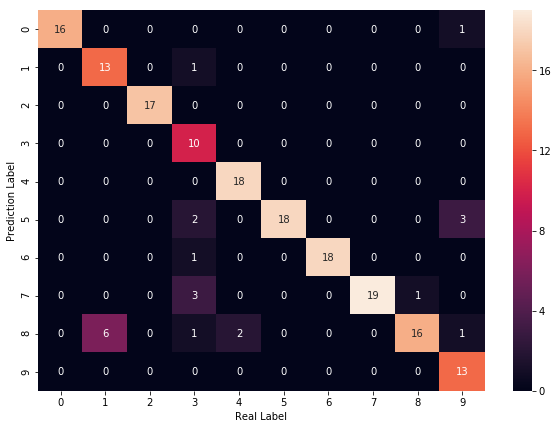

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:69 index:[5] real:5
#1 min_error:81 index:[2] real:2
#2 min_error:62 index:[8] real:8
#3 min_error:12 index:[0] real:0
#4 min_error:63 index:[1] real:1
#5 min_error:37 index:[7] real:7
#6 min_error:28 index:[6] real:6
#7 min_error:62 index:[3] real:3
#8 min_error:38 index:[2] real:2
#9 min_error:70 index:[1] real:1
#10 min_error:66 index:[7] real:7
#11 min_error:86 index:[8] real:4
#12 min_error:35 index:[6] real:6
#13 min_error:62 index:[3] real:3
#14 min_error:62 index:[1] real:1
#15 min_error:80 index:[3] real:3
#16 min_error:80 index:[5] real:9
#17 min_error:65 index:[1] real:1
#18 min_error:56 index:[7] real:7
#19 min_error:21 index:[6] real:6
#20 min_error:58 index:[8] real:8
#21 min_error:44 index:[4] real:4
#22 min_error:54 index:[3] real:3
#23 min_error:76 index:[1] real:1
#24 min_error:41 index:[4] real:4
#25 min_error:32 index:[0] real:0
#26 min_error:47 index:[5] real:5
#27 min_error:53 index:[3] real:3
#28 min_error:55 index:[6] real:6
#29 min_error:70 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8985776128633272
Avg Base Learner:0.7923760049474335


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

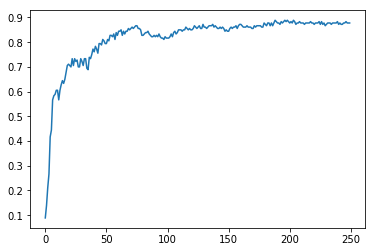

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4520 Total connections::4935
